 # Predator-Prey Relationships - The Lotka-Volterra Model
 
*[The following is adapted from Python Programming in OpenGL: A Graphical Approach to Programming by
Stan Blank, Ph.D., Wayne City High School, Wayne City, Illinois, 62895. http://new.math.uiuc.edu/public198/ipython/stanblank/PyOpenGL.pdf]*

The logistic equation is a simple model of a single population within a habitat.
We can expand this model to include populations which are dependent on one another,
such as a predator-prey relationship. The Lotka-Volterra predator-prey model[57] was
presented as a system of two differential equations as follows:

$dx/dt = ax − bxy$ 

$dy/dt = − cy + exy$

You probably haven’t studied differential equations, so I’ll attempt to interpret the
meaning of these. Let’s define $x$ to be the prey population and $y$ the predator
population. The first equation says something to the effect of “the change in $x$ (that’s the
$dx$ term) with respect to time (the $dt$ term) is determined by some parameter $a$ times the
previous $x$ population minus some parameter $b$ times the interaction between the
previous prey and predator populations $(x*y)$”. Specifically, we would reason that that
change in the prey population with respect to time ($dx/dt$) is affected by how many of
these organisms are available to reproduce ($ax$) and the negative impact of the
interaction between predators and prey ($-bx$). The predator population equation can
be translated in a similar fashion. The important thing to realize is that both equations
are “wired” together so that they interact with each other as do the populations they
model.

How do we translate these differential equations into a form usable by Python?
The equations assume continuous time, but we can’t program continuous time in any
computer language. We must take some liberties and rewrite the equations as follows:

$x = x + (ax – bxy)dt$

$y = y + (-cy + exy)dt$

where $dt$ represents a very tiny time increment and both $dx$ and $dy$ are represented by
$x$ and $y$ respectively. In the equations, the new population values are calculated by
adding the old values of $x$ and $y$ to the change in populations represented by the
equations in parentheses multiplied by the time increment. We can now use the
equations in Python and solve them numerically by iteration. Technically, these
equations are now called difference equations and the listing below will demonstrate
their graphical behavior.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
#from random import *
#from numpy import *
#import sys

## Run the Model

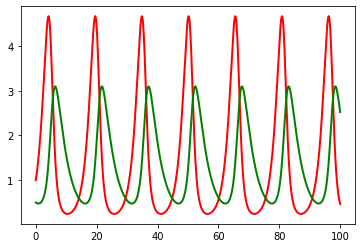

In [2]:
# model parameters
a = 0.7; b = 0.5; c = 0.3;  e = 0.2
dt = 0.001; max_time = 100

# initial time and populations
t = 0; x = 1.0; y = 0.5

# empty lists in which to store time and populations
t_list = []; x_list = []; y_list = []

# initialize lists
t_list.append(t); x_list.append(x); y_list.append(y)

while t < max_time:
    # calc new values for t, x, y
    t = t + dt
    x = x + (a*x - b*x*y)*dt
    y = y + (-c*y + e*x*y)*dt

    # store new values in lists
    t_list.append(t)
    x_list.append(x)
    y_list.append(y)  
    
# Plot the results    
p = plt.plot(t_list, x_list, 'r', t_list, y_list, 'g', linewidth = 2)

## Perform an Experiment with the Model
At t = 53.5, we will spray a broad spectrum pesticide which kills 90% of both populations.

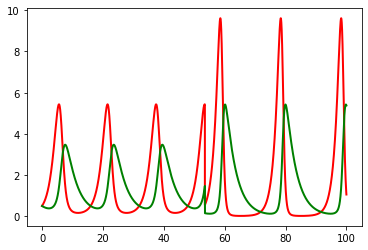

In [3]:
# model parameters
a = 0.7; b = 0.5; c = 0.3;  e = 0.2; dt = 0.001; max_time = 100

# initial time and populations
t = 0; x = 0.5; y = 0.5

# empty lists in which to store time and populations
t_list = []; x_list = []; y_list = []

# initialize lists
t_list.append(t); x_list.append(x); y_list.append(y)

time_bomb_armed = True
    
while t < max_time:
    # calc new value for t
    t = t + dt
    
    if time_bomb_armed and (t > 53.5):
        x = 0.1 * x
        y = 0.1 * y
        time_bomb_armed = False
        
    # calc new values for x and y
    x = x + (a*x - b*x*y)*dt
    y = y + (-c*y + e*x*y)*dt

    # store new values in lists
    t_list.append(t)
    x_list.append(x)
    y_list.append(y)  
    
# Plot the results    
p = plt.plot(t_list, x_list, 'r', t_list, y_list, 'g', linewidth = 2)

This is an unexpected result. When we reduce both populations by 90%, the prey population escapes from control by the predator population and has an outbreak. This **rebound** effect is often seen in the real world. For example, using a broad-spectrum insecticide to spray a field which contains aphids controlled by parasitoids may result in an increased population of aphids.

In [4]:
matplotlib==3.3.4


SyntaxError: invalid syntax (<ipython-input-4-8f1ff97347f2>, line 1)

In [ ]:
!pip freeze

In [ ]:
random.